C:\Users\imeho\Documents\VituralEnvs\InstantPINF\Lib\site-packages\phiml\backend\torch\_torch_backend.py:800: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:55.)
  return torch.sparse_csr_tensor(row_pointers, column_indices, values, shape, device=values.device)


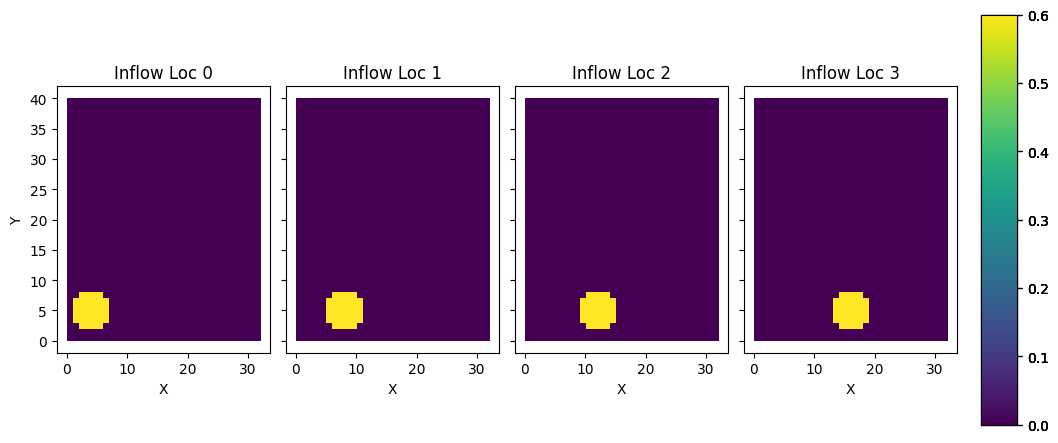

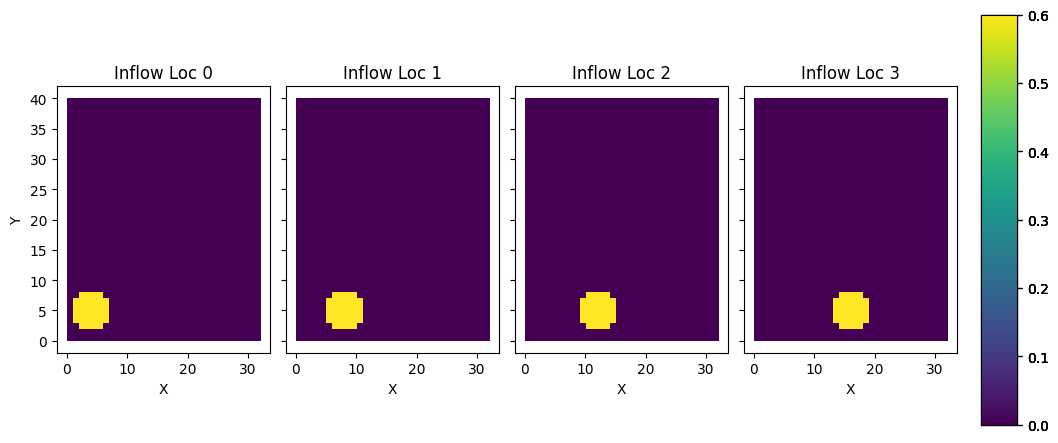

In [3]:
from phi.torch.flow import *

smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))  # sampled at cell centers
velocity = StaggeredGrid(0, extrapolation.ZERO, x=32, y=40, bounds=Box(x=32, y=40))  # sampled in staggered form at face centers

INFLOW_LOCATION = tensor([(4, 5), (8, 5), (12, 5), (16, 5)], batch('inflow_loc'), channel(vector='x,y'))
INFLOW = 0.6 * CenteredGrid(Sphere(center=INFLOW_LOCATION, radius=3), extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))

smoke += INFLOW
buoyancy_force = smoke * (0, 0.5) @ velocity
velocity += buoyancy_force
velocity, _ = fluid.make_incompressible(velocity)

vis.plot(smoke)